In [67]:
%load_ext autoreload
%autoreload 2

import sys
import os 
    
if not getattr(sys, "_src_path_added", False):
    src_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if src_path not in sys.path:
        sys.path.insert(0, src_path)
    sys._src_path_added = True 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
from SGA.SGA import *
from SGA.SGAParts import *
from SGA.SGAInstance import *

from ProblemDef import FirefighterProblem
from Displayer import Displayer

/home/jakub/.local/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


157
[0, 2, 4, 7, 9, 11, 13, 16, 18, 20, 23, 24, 28, 32, 39, 41, 45, 53, 59, 71, 74, 87, 94, 113, 121, 129, 131, 145, 164, 185]


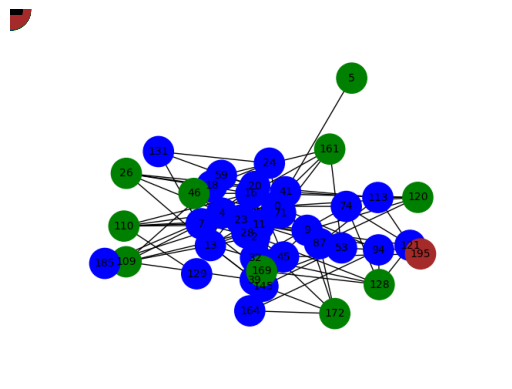

In [72]:
instance = SGAInstance("../problems/p7.json",
    populationInitializer= randomVertAndPathPI,
    populationSize = 2000,
    generationsNumber = 10000,
    parentsSelector = rankingParentsSelector,
    crossover = basicCrossover,
    mutationProb = 0.7,
    mutator = neighbourMutator,
    fixer = basicFixer,
    evaluator = basicEvaluator)

firemans =SGA(instance)
disp = Displayer()
instance.problem.visualize_fire_without_burned(disp, firemans, output_path="gif7.gif")

In [75]:
instance._mutator = noMutator

res1 = []
N=20

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)

print("noMutator", statistics.fmean(res1))

instance._mutator = basicMutator

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)

print("basicMutator", statistics.fmean(res2))

instance._mutator = neighbourMutator

res3 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res3.append(burned)

print("neighbourMutator", statistics.fmean(res3))

instance._mutator = mixedMutator

res4 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res4.append(burned)

print("mixedMutator", statistics.fmean(res4))


164
[0, 7, 8, 9, 10, 11, 16, 19, 20, 21, 41, 53, 59, 61, 62, 64, 71, 85, 87, 89, 90, 91, 97, 113, 115, 130, 140, 176, 179, 187]
165
[0, 2, 6, 7, 9, 11, 13, 16, 22, 26, 28, 31, 32, 33, 43, 44, 60, 74, 75, 82, 85, 87, 90, 97, 113, 121, 127, 140, 155, 169]
164
[0, 4, 7, 8, 10, 13, 14, 16, 18, 20, 23, 27, 30, 33, 38, 48, 65, 67, 75, 82, 83, 93, 109, 116, 146, 163, 170, 175, 178, 186]
164
[0, 2, 9, 11, 15, 16, 19, 23, 27, 29, 31, 34, 42, 45, 47, 55, 64, 69, 70, 71, 87, 88, 99, 104, 113, 114, 130, 132, 139, 164]
165
[0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 19, 24, 28, 32, 39, 45, 53, 103, 104, 118, 120, 125, 128, 136, 193, 198]
165
[0, 2, 4, 6, 9, 11, 16, 20, 25, 29, 30, 35, 42, 45, 53, 88, 93, 94, 96, 97, 113, 133, 141, 145, 147, 164, 166, 172, 173, 195]
165
[0, 6, 7, 8, 9, 14, 16, 21, 22, 23, 32, 33, 41, 43, 44, 45, 51, 59, 60, 64, 65, 91, 102, 113, 117, 118, 120, 162, 169, 197]
165
[0, 2, 6, 10, 11, 13, 17, 18, 21, 23, 28, 32, 39, 45, 51, 65, 72, 76, 82, 91, 98, 116, 117, 123, 124,

In [76]:
print("noMutator", statistics.fmean(res1), " " ,min(res1))
print("basicMutator", statistics.fmean(res2)," " ,min(res2))
print("neighbourMutator", statistics.fmean(res3)," " ,min(res3))
print("mixedMutator", statistics.fmean(res4)," " ,min(res4))

noMutator 164.7   164
basicMutator 164.6   164
neighbourMutator 164.65   164
mixedMutator 164.55   164


In [77]:
instance._populationInitializer = basicPI

res1 = []
N=20

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)


instance._populationInitializer = randomVertAndPathPI

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)


instance._populationInitializer = randomVertAndDistrictPI

res3 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res3.append(burned)


165
[0, 4, 6, 9, 16, 28, 29, 45, 48, 56, 80, 81, 87, 90, 100, 104, 113, 117, 123, 127, 138, 142, 147, 149, 158, 165, 170, 185, 186, 197]
165
[0, 4, 6, 7, 12, 19, 31, 33, 37, 50, 51, 52, 53, 56, 57, 66, 84, 87, 89, 107, 111, 118, 144, 149, 157, 162, 175, 177, 180, 198]
166
[0, 1, 4, 24, 29, 30, 31, 34, 76, 80, 81, 83, 88, 95, 104, 105, 120, 122, 125, 129, 137, 138, 146, 157, 180, 183, 184, 185, 191, 198]
165
[0, 8, 9, 13, 14, 20, 23, 28, 33, 47, 48, 54, 65, 75, 94, 96, 100, 102, 113, 114, 124, 126, 135, 145, 146, 167, 176, 189, 190, 197]
165
[0, 9, 16, 18, 24, 26, 30, 33, 39, 42, 51, 58, 64, 82, 87, 88, 97, 106, 108, 113, 117, 126, 159, 165, 171, 176, 183, 184, 189, 195]
165
[0, 3, 7, 10, 14, 25, 31, 42, 43, 56, 66, 67, 71, 73, 74, 75, 78, 91, 93, 104, 106, 112, 116, 128, 158, 167, 183, 189, 193, 195]
165
[0, 21, 23, 33, 38, 41, 49, 63, 69, 79, 84, 86, 93, 98, 106, 111, 113, 118, 119, 128, 129, 130, 131, 144, 162, 173, 176, 177, 197, 199]
166
[0, 2, 7, 10, 14, 17, 22, 26, 34, 42, 46, 61

In [78]:
print("basicPI", statistics.fmean(res1), " " ,min(res1))
print("randomVertAndPathPI", statistics.fmean(res2)," " ,min(res2))
print("randomVertAndDistrictPI", statistics.fmean(res3)," " ,min(res3))
instance._populationInitializer = basicPI

basicPI 165.15   164
randomVertAndPathPI 164.75   164
randomVertAndDistrictPI 164.9   164


In [79]:
instance._parentsSelector = basicParentsSelector

res1 = []
N=20

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)

instance._parentsSelector = rankingParentsSelector

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)

165
[0, 7, 8, 9, 10, 16, 17, 18, 21, 22, 26, 28, 40, 41, 54, 59, 62, 64, 66, 78, 80, 99, 106, 116, 122, 128, 132, 149, 153, 163]
165
[0, 1, 4, 6, 8, 11, 14, 20, 33, 44, 50, 51, 53, 55, 58, 60, 62, 65, 68, 69, 85, 89, 102, 117, 141, 142, 153, 156, 175, 193]
165
[0, 6, 8, 15, 19, 23, 24, 25, 30, 31, 39, 42, 49, 68, 78, 79, 84, 88, 93, 109, 115, 139, 145, 146, 158, 177, 178, 179, 184, 193]
165
[0, 1, 6, 8, 9, 11, 13, 17, 22, 28, 29, 30, 39, 40, 45, 46, 59, 62, 65, 73, 81, 88, 91, 102, 103, 109, 122, 136, 175, 196]
165
[0, 2, 14, 19, 24, 27, 33, 34, 54, 60, 61, 65, 76, 79, 82, 94, 101, 106, 123, 124, 125, 129, 130, 133, 148, 152, 168, 170, 183, 189]
165
[0, 2, 4, 7, 8, 10, 14, 18, 21, 34, 41, 50, 57, 63, 67, 70, 79, 80, 84, 85, 107, 110, 112, 118, 130, 150, 154, 162, 165, 174]
165
[0, 1, 8, 9, 10, 12, 14, 29, 31, 33, 40, 47, 50, 55, 65, 74, 85, 86, 101, 113, 115, 128, 131, 132, 145, 146, 156, 174, 189, 192]
165
[0, 4, 7, 8, 9, 11, 16, 20, 34, 37, 47, 54, 69, 74, 86, 87, 94, 105, 107, 113, 

In [80]:
print("basicParentsSelector", statistics.fmean(res1), " " ,min(res1))
print("rankingParentsSelector", statistics.fmean(res2)," " ,min(res2))

basicParentsSelector 165.0   165
rankingParentsSelector 164.95   164
